In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import numpy as np
from scipy import stats
import pylab as plt
import torch
import swyft
import torch
DEVICE = 'gpu' if torch.cuda.is_available() else 'cpu'

In [47]:
torch.manual_seed(0)
np.random.seed(0)

In [48]:
N = 30000  # Number of samples
z = np.random.rand(N, 3)*2 - 1
r = (z[:,0]**2 + z[:,1]**2 + 0.5*z[:, 0]*z[:,1]*z[:,2])**0.5
x = r.reshape(N, 1) + np.random.randn(N, 1)*0.02
samples = swyft.Samples(x = x, z = z)

In [49]:
class Network(swyft.SwyftModule):
    def __init__(self):
        super().__init__()
        self.learning_rate = 1e-3
        self.lre = swyft.lightning.LogRatioEstimator((0, 1), '2d', num_features = 1, varname = 'z')
        self.s = torch.nn.LazyLinear(7)

    def forward(self, A, B):
        s = self.s(A['x'])
        z = B['z']
        logratios1 = self.lre(s, z)
        return logratios1

In [50]:
trainer = swyft.SwyftTrainer(accelerator = DEVICE, precision = 64, max_epochs = 1)
dm = swyft.SwyftDataModule(samples)
network = Network()
trainer.fit(network, dm)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type              | Params
-------------------------------------------
0 | lre  | LogRatioEstimator | 34.7 K
1 | s    | LazyLinear        | 0     
-------------------------------------------
34.7 K    Trainable params
0         Non-trainable params
34.7 K    Total params
0.278     Total es

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


Reloading best model: /gpfs/home2/weniger/swyft/notebooks/dev/lightning_logs/version_4485854/checkpoints/epoch=0-step=750-v6.ckpt


In [51]:
x0 = 0.5
obs = swyft.Sample(x = np.array([x0]))
prior_samples = swyft.Samples(z = np.random.rand(30_000, 3)*2-1)
predictions = trainer.infer(network, obs, prior_samples)

The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: EarlyStopping, ModelCheckpoint
You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 750it [00:00, ?it/s]

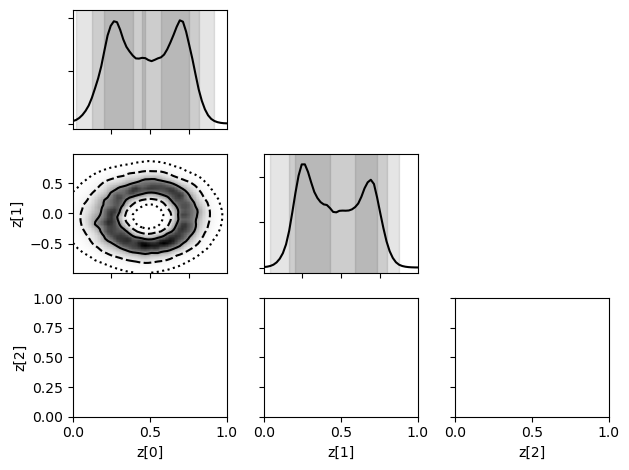

In [52]:
swyft.plot_corner(predictions, ['z[0]', 'z[1]', 'z[2]'], bins = 50, smooth_prior = False, smooth = 1);


1. Extract information from `predictions`. What lenght is it? What types of `LogRatioSamples` does it contain? What is the shape of `logratios` and `params`?

In [27]:
# Results go here

2. Provide only partial information when making inference plot.

In [28]:
# Results go here

3. Extend above example to estimate all marginal posteriors.

In [13]:
# Results go here